# Passenger Prediction CrowdStrike Round-3



Each year a large number of flights land in India carrying thousands and lakhs of people form different parts of the world. Predicting the crowd for the upcoming year can help in making the arrangements and facilities better. The prediction can be useful for a large number of business domains.

## Imporing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Candidate/Training.csv')

In [3]:
df.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
0,2015,Q1,AFGHANISTAN,37194,32721,96.7,676.4
1,2015,Q1,AUSTRALIA,16676,19075,89.7,423.7
2,2015,Q1,AUSTRIA,13318,15529,563.8,707.0
3,2015,Q1,BAHRAIN,114087,133527,585.7,1909.5
4,2015,Q1,BANGLADESH,76357,75673,624.1,1052.9


In [4]:
df.nunique()

YEAR                       2
QUARTER                    4
COUNTRY_NAME              54
PASSENGERS_TO_INDIA      395
PASSENGERS_FROM_INDIA    401
FREIGHT_TO_INDIA         342
FREIGHT_FROM_INDIA       386
dtype: int64

In [5]:
df.shape

(432, 7)

In [6]:
plt.rcParams["figure.figsize"] = (30,10)

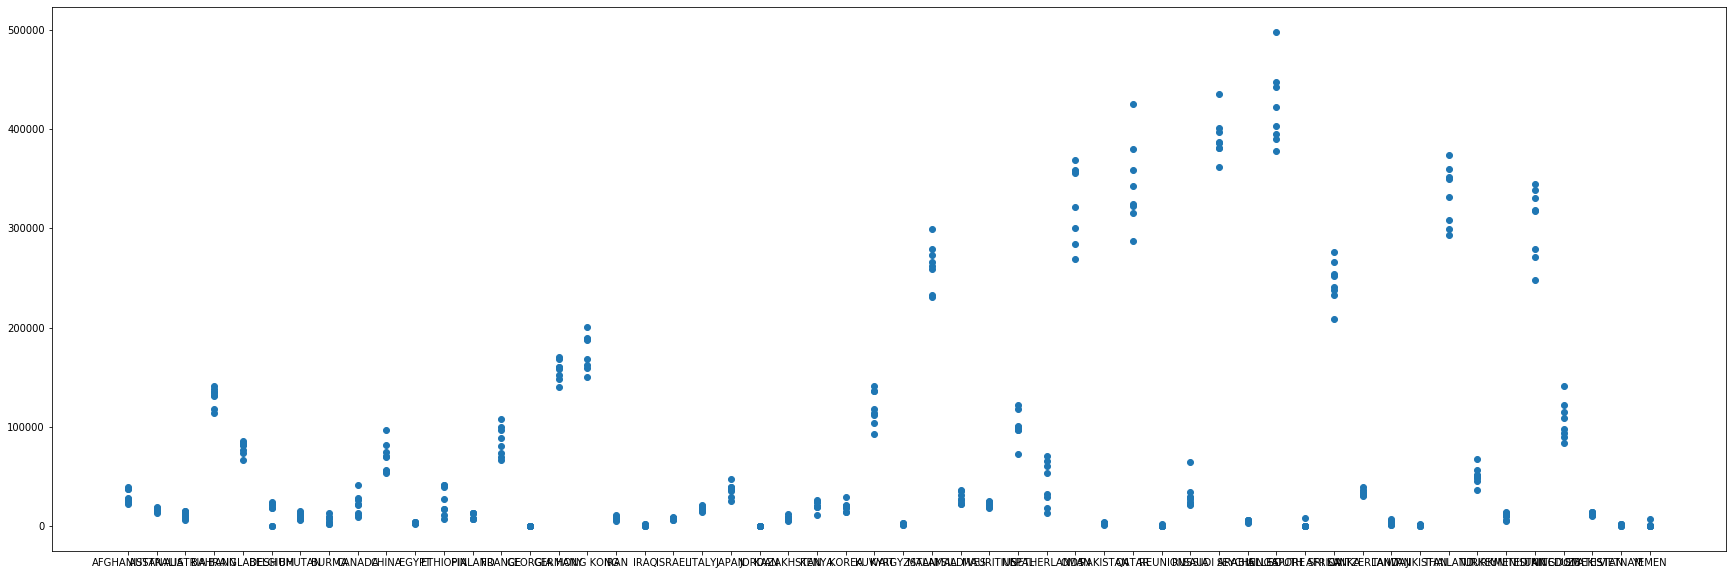

In [7]:
plt.scatter(y = 'PASSENGERS_TO_INDIA', x = 'COUNTRY_NAME', data = df)
plt.show()

In [8]:
data = pd.read_csv('Candidate/Training.csv')

In [9]:
data = data.drop(['PASSENGERS_TO_INDIA', 'FREIGHT_TO_INDIA', 'FREIGHT_FROM_INDIA'], axis = 1)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data['COUNTRY_NAME'] = le.fit_transform(data['COUNTRY_NAME'])
data['QUARTER'] = le.fit_transform(data['QUARTER'])
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA
0,2015,0,0,32721
1,2015,0,1,19075
2,2015,0,2,15529
3,2015,0,3,133527
4,2015,0,4,75673


In [11]:
temp2 = pd.get_dummies(data['COUNTRY_NAME'], prefix = 'country', drop_first = True)
data = pd.concat([data, temp2], axis = 1)
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,country_1,country_2,country_3,country_4,country_5,country_6,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,0,32721,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,1,19075,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,2,15529,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,3,133527,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,4,75673,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data = data.drop(['COUNTRY_NAME'], axis = 1)
data.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,country_1,country_2,country_3,country_4,country_5,country_6,country_7,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,32721,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,19075,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,15529,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,133527,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,75673,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = data['PASSENGERS_FROM_INDIA']
X = data.drop(['PASSENGERS_FROM_INDIA'], axis = 1)
X.head()

,YEAR,QUARTER,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
datat = pd.read_csv('Candidate/Testing.csv')

In [15]:
datat['COUNTRY_NAME'] = le.fit_transform(datat['COUNTRY_NAME'])
datat['QUARTER'] = le.fit_transform(datat['QUARTER'])
datat.head()

,YEAR,QUARTER,COUNTRY_NAME
0,2017,0,0
1,2017,0,1
2,2017,0,2
3,2017,0,3
4,2017,0,4


In [16]:
temp1 = pd.get_dummies(datat['COUNTRY_NAME'], prefix = 'country', drop_first = True)
datat = pd.concat([datat, temp1], axis = 1)
datat = datat.drop(['COUNTRY_NAME'], axis = 1)
datat.head()

,YEAR,QUARTER,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500,random_state=33)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [18]:
predictions = rf.predict(datat)

In [19]:
predictions = predictions.astype(int)

In [20]:
predictions

array([ 31811,  20308,  15833, 141594,  87697,  18189,  13556,  12247,
        28506,  76417,   6579,  27472,  18119,  96364,   1183, 175402,
       177609,  13525,   2547,  12028,  21441,  45084,   1576,  12871,
        23632,  21321, 126848,   4192, 284182,  34798,  24390,  98112,
        43534, 357462,   8991, 361777,   2009,  31170, 424891,  10068,
       470676,   4798, 261381,  38965,  12105,   2389, 349311,  56799,
        14867, 345221, 137887,  15269,   3445,   3736])

In [21]:
dup = pd.read_csv('Candidate/Testing.csv')

In [22]:
dup['PASSENGERS_FROM_INDIA'] = predictions

In [23]:
dup.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA
0,2017,Q1,AFGHANISTAN,31811
1,2017,Q1,AUSTRALIA,20308
2,2017,Q1,AUSTRIA,15833
3,2017,Q1,BAHRAIN,141594
4,2017,Q1,BANGLADESH,87697


In [24]:
data = pd.read_csv('Candidate/Training.csv')

In [25]:
data = data.drop(['PASSENGERS_TO_INDIA', 'FREIGHT_FROM_INDIA'], axis =  1)

In [26]:
data['COUNTRY_NAME'] = le.fit_transform(data['COUNTRY_NAME'])
data['QUARTER'] = le.fit_transform(data['QUARTER'])
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA
0,2015,0,0,32721,96.7
1,2015,0,1,19075,89.7
2,2015,0,2,15529,563.8
3,2015,0,3,133527,585.7
4,2015,0,4,75673,624.1


In [27]:
temp2 = pd.get_dummies(data['COUNTRY_NAME'], prefix = 'country', drop_first = True)
data = pd.concat([data, temp2], axis = 1)
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,country_1,country_2,country_3,country_4,country_5,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,0,32721,96.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,1,19075,89.7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,2,15529,563.8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,3,133527,585.7,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,4,75673,624.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data = data.drop(['COUNTRY_NAME'], axis = 1)

In [29]:
y = data['FREIGHT_TO_INDIA']
X = data.drop(['FREIGHT_TO_INDIA'], axis = 1)
X.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,country_1,country_2,country_3,country_4,country_5,country_6,country_7,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,32721,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,19075,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,15529,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,133527,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,75673,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df = dup

In [31]:
df['COUNTRY_NAME'] = le.fit_transform(df['COUNTRY_NAME'])
df['QUARTER'] = le.fit_transform(df['QUARTER'])

In [32]:
temp1 = pd.get_dummies(df['COUNTRY_NAME'], prefix = 'country', drop_first = True)
df = pd.concat([df, temp1], axis = 1)
df = df.drop(['COUNTRY_NAME'], axis = 1)
df.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,country_1,country_2,country_3,country_4,country_5,country_6,country_7,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2017,0,31811,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,20308,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,0,15833,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,141594,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,0,87697,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
rf1 = RandomForestRegressor(n_estimators = 500,random_state=33)
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [34]:
predictions = rf1.predict(df)

In [35]:
predictions = predictions.astype(int)

In [36]:
predictions

array([  212,   112,   497,   528,   712,  1199,   129,     5,   521,
        3325,    43,   225,   393,  4612,     0, 12261, 23134,   192,
           1,   173,   426,  2252,     0,   102,   106,   424,   842,
           3,  2783,    70,    72,   159,  1916,   694,    15, 11674,
           3,   254,  1519,     2, 13053,    10,  2787,  2179,   247,
           1,  9605,  3057,   264, 11144,  1380,   886,     4,     2])

In [37]:
dup['FREIGHT_TO_INDIA'] = predictions

In [38]:
dup.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA
0,2017,0,0,31811,212
1,2017,0,1,20308,112
2,2017,0,2,15833,497
3,2017,0,3,141594,528
4,2017,0,4,87697,712


In [39]:
data = pd.read_csv('Candidate/Training.csv')

In [40]:
data = data.drop(['PASSENGERS_TO_INDIA'], axis =  1)

In [41]:
data['COUNTRY_NAME'] = le.fit_transform(data['COUNTRY_NAME'])
data['QUARTER'] = le.fit_transform(data['QUARTER'])
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
0,2015,0,0,32721,96.7,676.4
1,2015,0,1,19075,89.7,423.7
2,2015,0,2,15529,563.8,707.0
3,2015,0,3,133527,585.7,1909.5
4,2015,0,4,75673,624.1,1052.9


In [42]:
temp2 = pd.get_dummies(data['COUNTRY_NAME'], prefix = 'country', drop_first = True)
data = pd.concat([data, temp2], axis = 1)
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,country_1,country_2,country_3,country_4,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,0,32721,96.7,676.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,1,19075,89.7,423.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,2,15529,563.8,707.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,3,133527,585.7,1909.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,4,75673,624.1,1052.9,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data = data.drop(['COUNTRY_NAME'], axis = 1)

In [44]:
y = data['FREIGHT_FROM_INDIA']
X = data.drop(['FREIGHT_FROM_INDIA'], axis = 1)
X.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,country_1,country_2,country_3,country_4,country_5,country_6,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,32721,96.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,19075,89.7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,15529,563.8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,133527,585.7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,75673,624.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df1 = dup

In [46]:
df1['COUNTRY_NAME'] = le.fit_transform(df1['COUNTRY_NAME'])
df1['QUARTER'] = le.fit_transform(df1['QUARTER'])
df1.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA
0,2017,0,0,31811,212
1,2017,0,1,20308,112
2,2017,0,2,15833,497
3,2017,0,3,141594,528
4,2017,0,4,87697,712


In [47]:
temp1 = pd.get_dummies(df1['COUNTRY_NAME'], prefix = 'country', drop_first = True)
df1 = pd.concat([df1, temp1], axis = 1)
df1 = df1.drop(['COUNTRY_NAME'], axis = 1)
df1.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,country_1,country_2,country_3,country_4,country_5,country_6,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2017,0,31811,212,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,20308,112,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,0,15833,497,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,141594,528,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,0,87697,712,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
rf1 = RandomForestRegressor(n_estimators = 500,random_state=33)
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [49]:
predictions = rf1.predict(df1)

In [50]:
predictions = predictions.astype(int)

In [51]:
predictions

array([ 1032,   358,   703,  2445,  1142,  1058,   254,    38,   650,
        2144,   115,  1628,   795,  5202,    14, 15138, 15379,   406,
           7,   377,   423,  2343,    14,   230,   580,   572,  3445,
          55,  5268,   643,   652,   493,  2823,  4884,    63, 22539,
          23,   993, 11835,    24, 14843,    51,  5975,  2769,   330,
          25,  6328,  3768,   525, 17150,  2555,  1735,    42,    48])

In [52]:
dup['FREIGHT_FROM_INDIA'] = predictions

In [53]:
data = pd.read_csv('Candidate/Training.csv')

In [54]:
data['COUNTRY_NAME'] = le.fit_transform(data['COUNTRY_NAME'])
data['QUARTER'] = le.fit_transform(data['QUARTER'])
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
0,2015,0,0,37194,32721,96.7,676.4
1,2015,0,1,16676,19075,89.7,423.7
2,2015,0,2,13318,15529,563.8,707.0
3,2015,0,3,114087,133527,585.7,1909.5
4,2015,0,4,76357,75673,624.1,1052.9


In [55]:
temp2 = pd.get_dummies(data['COUNTRY_NAME'], prefix = 'country', drop_first = True)
data = pd.concat([data, temp2], axis = 1)
data.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,country_1,country_2,country_3,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,0,37194,32721,96.7,676.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,1,16676,19075,89.7,423.7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,2,13318,15529,563.8,707.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,3,114087,133527,585.7,1909.5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,4,76357,75673,624.1,1052.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data = data.drop(['COUNTRY_NAME'], axis = 1)

In [57]:
y = data['PASSENGERS_TO_INDIA']
X = data.drop(['PASSENGERS_TO_INDIA'], axis = 1)
X.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,country_1,country_2,country_3,country_4,country_5,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2015,0,32721,96.7,676.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,0,19075,89.7,423.7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,15529,563.8,707.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,133527,585.7,1909.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,0,75673,624.1,1052.9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df2 = dup

In [59]:
df2['COUNTRY_NAME'] = le.fit_transform(df2['COUNTRY_NAME'])
df2['QUARTER'] = le.fit_transform(df2['QUARTER'])
df2.head()

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
0,2017,0,0,31811,212,1032
1,2017,0,1,20308,112,358
2,2017,0,2,15833,497,703
3,2017,0,3,141594,528,2445
4,2017,0,4,87697,712,1142


In [60]:
temp1 = pd.get_dummies(df2['COUNTRY_NAME'], prefix = 'country', drop_first = True)
df2 = pd.concat([df2, temp1], axis = 1)
df2 = df2.drop(['COUNTRY_NAME'], axis = 1)
df2.head()

,YEAR,QUARTER,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,country_1,country_2,country_3,country_4,country_5,...,country_44,country_45,country_46,country_47,country_48,country_49,country_50,country_51,country_52,country_53
0,2017,0,31811,212,1032,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,20308,112,358,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,0,15833,497,703,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,141594,528,2445,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,0,87697,712,1142,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
rf1 = RandomForestRegressor(n_estimators = 500,random_state=33)
rf1.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [62]:
predictions = rf1.predict(df2)

In [63]:
predictions = predictions.astype(int)

In [64]:
predictions

array([ 29754,  17650,  13009, 131902,  82750,  17137,  11970,  11615,
        24712,  72014,   5490,  23616,  17067,  95054,   1311, 158577,
       160179,  11859,   2394,  11426,  16662,  38022,   1444,  11411,
        20608,  19526, 115268,   3154, 277961,  33127,  21982,  95863,
        36005, 350817,   7936, 332240,   2293,  29517, 393082,   7652,
       423639,   3312, 258613,  32536,  11062,   2384, 339890,  52238,
        13209, 322841, 133200,  13385,   2554,   3209])

In [65]:
dataf = pd.read_csv('Candidate/Testing.csv')

In [66]:
new_df = pd.DataFrame()
new_df['COUNTRY_NAME']=dataf.COUNTRY_NAME
new_df['PASSENGERS_TO_INDIA']=predictions
new_df.to_csv('RESULT_RF.csv', index = False)

In [67]:
new_df.head()

,COUNTRY_NAME,PASSENGERS_TO_INDIA
0,AFGHANISTAN,29754
1,AUSTRALIA,17650
2,AUSTRIA,13009
3,BAHRAIN,131902
4,BANGLADESH,82750
